# MAE 3120
## HW 04


Due 04/11

For full credit, show all your work.  

### 1  Dynamic response of a Thermistor

A thermistor is immersed in a liquid to monitor its temperature fluctuations.  The temperature (in Kelvin) varies in time as:
\begin{equation*}
T(t) = 310 + 10 \cos (2\pi  t)
\end{equation*}
The thermistor is connected to an electronic transducer system.  Overall the system responds as a first-order dynamic system with static sensitivity of 1 mV/K.  A step-input calibration of the system reveals that its time constant is $\tau = 1$ s.

Assume that at $t<0$ the thermistor is immersed in the fluid, which has a constant temperature $T=310$ K.  The sinusoidal forcing starts at $t\geq0$.


(a) Determine the angular frequency, $\omega$, of the temperature fluctuations.

The frequency is $f=1$ Hz, which gives an angular frequency $\omega = 2\pi$ rad/s.

(b) Plot the output $E(t)$ in mV for the first 30 s.  On the same graph overlay the input $T(t)$.

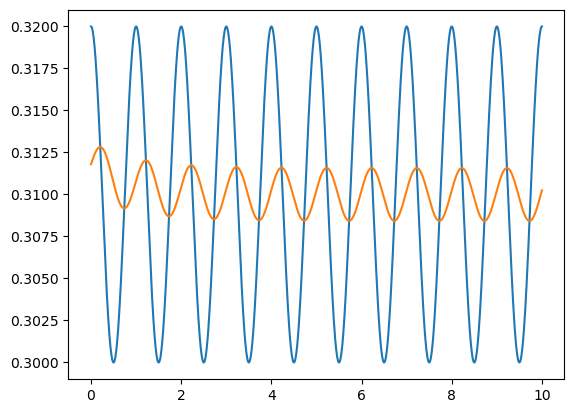

In [6]:
import numpy
from matplotlib import pyplot
%matplotlib inline

def y_sin(t,T,tau,y_0,K,A):
   ''' Calculate the output of a first order ode when forcing function is 
   a sine wave of frequency f with phase phi
   Arguments
   ---------
   t: time (in second)
   T : period of the forcing sine wave (s)
   tau: time constant of the system (s)
   K: static sensitivity (dimensionless)
   A: amplitude of forcing (unit of F)
   Returns
   -------
   y_sin : Output of 1st order ode, see eqn above.
   '''    
   omega = 2*numpy.pi/T # convert f to radial frequency
   phi = -numpy.arctan(omega*tau) 
   y_sin = ((omega*tau*K*A)/(omega**2*tau**2+1))*numpy.exp(-t/tau) + K*A/(numpy.sqrt(omega**2*tau**2+1)) \
    *numpy.cos(omega*t+phi) + y_0

   return y_sin

t = numpy.linspace(0,10,1000)
T= 1
Temp = 310 + 10*numpy.cos(2*numpy.pi*t)
#tau = numpy.cos(1*2*numpy.pi*t)
#V = (1 - numpy.exp(-t / 1)) * T 
tau = 1
K = 1/1000
A = 10
y_0 = 310*K

y_out = y_sin(t,T,tau,y_0,K,A)

omega = 2*numpy.pi
pyplot.plot(t,K*Temp)
pyplot.plot(t,y_out)


(c) Once the system has reached steady state determine the time lag $\beta$ in seconds between the output and the input.

The phase is (in radian):
\begin{align*}
\phi & = \tan^{-1}(-\omega \tau) = -\tan^{-1}(\omega \tau)
\end{align*}

The _phase lag_ (in seconds), or lag time, $\beta$, is:

\begin{align*}
\beta = \frac{\phi}{\omega}
\end{align*}

In [7]:
phi = numpy.arctan(-omega*tau)
beta = phi/omega
print('phi =', phi,'rad =', phi*180/numpy.pi,'deg')
print('beta = ', beta, 's')

phi = -1.4129651365067377 rad = -80.95693892096232 deg
beta =  -0.22488038589156198 s


(d) Remember the definition of the dynamic error (excluding the transient):

\begin{align*}
\epsilon_f(\omega) = 1 - \frac{1}{\sqrt{1+\omega^2 \tau^2}}
\end{align*}

Compute it.

In [8]:
dyn_error = 1 - (1/ numpy.sqrt(1+ (omega*tau)**2))
print('the dynamic error is ',dyn_error*100,'%')

the dynamic error is  84.282327452241 %


(e) What should be a minimal value of the time constant for the thermistor faithfully measure the temperature in the steady-state regime?  Here we will consider that the thermistor is adequately sized if the dynamic error is kept below 0.1\%.

In [13]:
tc = numpy.sqrt(((1/(1-0.001))**2 - 1)/omega**2)
print('the time constant must be no more than, tau <',tc,'s')


the time constant must be no more than, tau < 0.007122968774106048 s


(f) The definition of the time constant of a thermistor is related to the time it takes to reach thermal-equilibrium
\begin{equation*}
\tau = \frac{mC}{hA}
\end{equation*}
Assume the that the thermocouple is spherical, has constant density $\rho$, and both the specific heat $C$ and heat transfer coefficient $h$ are constant.  By how much would you need to reduce the radius of the thermocouple to have a faithful response?

\begin{align}
m & = \rho \frac{4\pi}{3} r^3 \\
A & = 4\pi r^2\\
\end{align}

$C$ and $h$ are constant, so $\tau$ reduces to:
\begin{align}
\tau = \frac{\rho C}{3 h} r
\end{align}

$\tau$ changes linearly with $r$.  So $r$ should be reduced to 0.7\% of its original size.

### 2  Pressure Measurement 

A pressure transducer is connected to a digital data-acquisition board on a computer.  The characteristics of the pressure transducer and the data-acquisition system (DAS) are given below.  All uncertainties are given at 95\% confidence level.  

Additionally, you know: 

The pressure transducer output ($V_{out}$) is defined by its sensitivity, $K$, which is a function of supply voltage ($V_s$) and pressure $P$:
\begin{align*}
V_{out} = K (1/\text{Pa}) \times P (\text{Pa}) \times V_s (\text{VDC})
\end{align*}

Here the expected pressure is up to $P = 1,000$ kPa.

_Pressure Transducer Characteristics_

Sensitivity: $K = 1\times 10^{-7}$ Pa$^{-1}$ 

Supply voltage: $V_s = 10$ VDC

Range: 0-2,000 kPa 

Linearity: $\pm 0.25\%$ of reading 

Repeatability: $\pm 0.06\%$ of reading

Hysterisis: $\pm 0.1\%$ of reading

_DAS Characteristics_

Number of bits: 16 bits

Input range: $0-10,\, 0-1,\, 0-0.1,\, 0-0.01$ V

Gain error: $\pm 1$ LSD

Linearity: $\pm 1$ LSD

(a) What is expected range of the pressure transducer output (in Volts).

In [4]:
K = 10**(-7)
P = 10**6
Vs = 10
V_out = K*P*Vs
print('V_out is', V_out, "V")

V_out is 0.9999999999999999 V


(b) Select the DAS input range that will give the best accuracy.

The best DAS input range is 0-1V.  Smaller range could result in clipping.

(c) Estimate the uncertainties (at 95\% confidence level) from the pressure transducer, $u_{PT}$ and the DAS, $u_{DAS}$. 

In [7]:
# PT, this is uncertainty of reading, so use % error directly, or relative uncertainties
u_ll = .0025 
u_rr = 0.0006 
u_hh = 0.001 
U_ptpt = numpy.sqrt(u_ll**2 + u_rr**2 + u_hh**2)

print('u_ptpt', U_ptpt*100, '%')

# DAQ, we will use percentage uncertainty to be consistent with PT 
N = 16 # bits
Range = 1 # V, guarantee no clipping
Q = 1/2**(N+1) # V
LSD = 2* Q # V
u_d_lin = 1 * LSD # V
u_d_gain = 1 * LSD # V
u_DAS = numpy.sqrt(u_d_lin**2 + u_d_gain**2 + Q**2)

print('u_DAS =', u_DAS*100,'%')


u_ptpt 0.2758622844826744 %
u_DAS = 0.002288818359375 %


(d) What is the overall uncertainty on pressure measurements made by this system.  

In [9]:
u_o = numpy.sqrt(u_DAS**2 + U_ptpt**2)
print('the total uncertainty is u_o =', u_o*100, '%')

the total uncertainty is u_o = 0.27587177943653857 %


(e) Which component contribute the most to uncertainty?  Provide a scheme to reduce the overall uncertainty.

The pressure transducer contributes the most to the uncertainty measurement, specifically, the linearity error.

To reduce this uncertainty, it could be calibrated over several points to provide a new, nonlinear, calibration curve.  Alternatively, one could select a different tranducer.


### 3 MTV accuracy

Molecular Tagging Velocimetry is an elegant technique to measure fluid velocity, $U$, in a time of flight manner:
\begin{align}
U = M \frac{\delta x}{\delta t}
\end{align}
Where $M$ is the magnification in pixel/m, $\delta x$ the measured displacement in pixel, and $\delta t$ the time interval over which the displacement is measured in second.


(a) How accurately can the velocity be determined if we have the following uncertainties:
$u_M = 3\%$, $u_{\delta x} = 1\%$, and $u_{\delta t} = 0.0001\%$.

One can recognize that this is the uncertainty of a result.  Since the equation is polynomial, we can use the simplified form of the relative uncertainty:

\begin{align}
\frac{u_R}{R} = \sqrt{\sum_i \left( a_i \frac{u_{x_i}}{x_i} \right)^2}\end{align}

Which here reduces to:
\begin{align}
\frac{u_U}{U} = \sqrt{\left( 1 \frac{u_M}{M} \right)^2 + \left( 1 \frac{u_{\delta x}}{\delta x} \right)^2 + \left( - 1 \frac{u_{\delta t}}{\delta t} \right)^2} 
\end{align}
with 
\begin{align}
\frac{u_M}{M} & = 0.03\\
\frac{u_{\delta x}}{\delta x} & = 0.01 \\ 
\frac{u_{\delta t}}{\delta t} & = 1\times 10^{-6}
\end{align}

In [11]:
u_UU = numpy.sqrt(0.03**2 + 0.01**2)
print('the velocity uncertainty is u_U/U = ',u_UU*100, '%') 

the velocity uncertainty is u_U/U =  3.162277660168379 %


(b) Which term contributes the most to the uncertainty?

The magnification.

(b) Suppose now that the velocity must be measured with an accuracy of $\pm 2\%$.  How accurate must the magnification be?

Here, one should be careful to invert the equation for $U$, but the equation for $u_U$.  We can neglect $u_{\delta t}$.

\begin{align}
\left(\frac{u_U}{U}\right)^2 & = \left( \frac{u_M}{M} \right)^2 + \left( \frac{u_{\delta x}}{\delta x} \right)^2 \\
\frac{u_M}{M} & = \sqrt{\left(\frac{u_U}{U}\right)^2 - \left( \frac{u_{\delta x}}{\delta x} \right)^2}
\end{align}

In [10]:
u_m = numpy.sqrt(0.02**2 - 0.01**2)
print('the uncertainty of magnification needs to u_M/M <',u_m*100, '%')

the uncertainty of magnification needs to u_M/M < 1.7320508075688772 %


### 4 Taguchi Design Arrays 

A company makes CMOS sensors that are to be used in scientific high-speed cameras. They want to maximize the sensor sensitivity and need to test four parameters ($a$, $b$, $c$, and $d$). A three-level experiment (with each level of each parameter repeated 3 times) is chosen. Levels 1, 2, and 3 correspond to low, medium, and high values of each respective parameter. A standard Taguchi 9-run design array is used. For each experimental run, 50 CMOS sensors are tested. For a given light source intensity, the engineers measure the recorded intensity averaged over the sensor, $X_i$.  The results are shown in the table below.

\begin{array}{c |c|c|c|c| c}
Run \# & a & b & c & d & X_i \\
\hline
1 & 1 & 1 & 1 & 1 & 2146 \\
2 & 1 & 2 & 2 & 2 & 2422 \\
3 & 1 & 3 & 3 & 3 & 2539 \\
4 & 2 & 1 & 2 & 3 & 2572 \\
5 & 2 & 2 & 3 & 1 & 2664 \\
6 & 2 & 3 & 1 & 2 & 2592 \\
7 & 3 & 1 & 3 & 2 & 2715 \\
8 & 3 & 2 & 1 & 3 & 2357 \\
9 & 3 & 3 & 2 & 1 & 2307 \\
\hline
\end{array}



(a) Calculate the 12 level averages, i.e. $\bar{X}_{a1},  \bar{X}_{a2}, \dots, \bar{X}_{d3}$.

In [12]:
x1 = 2146
x2 = 2422 
x3 = 2539
x4 = 2572
x5 = 2664
x6 = 2592
x7 = 2715
x8 = 2357
x9 = 2307
c=1/3

a1 = c*(x1+x2+x3); a2 = c*(x4+x5+x6); a3 = c*(x7+x8+x9);
b1 = c*(x1+x4+x7); b2 = c*(x2+x5+x8); b3 = c*(x3+x6+x9)
c1 = c*(x1+x6+x8); c2 = c*(x2+x4+x9); c3 = c*(x3+x5+x7)
d1 = c*(x1+x5+x9); d2 = c*(x2+x6+x7); d3 = c*(x3+x4+x8)

print('a1=',a1,'a2=',a2, 'a3=',a3, 'b1=',b1,'b2=',b2,'b3=',b3,'c1=',c1,'c2=',c2,'c3=',c3,'d1=',d1,'d2=',d2,'d3=',d3)

a1= 2369.0 a2= 2609.333333333333 a3= 2459.6666666666665 b1= 2477.6666666666665 b2= 2481.0 b3= 2479.333333333333 c1= 2365.0 c2= 2433.6666666666665 c3= 2639.333333333333 d1= 2372.333333333333 d2= 2576.333333333333 d3= 2489.333333333333


(b) Generate 4 plots showing the dependence of $X$ on each parameter.  Make sure to label your plots properly.  For simplicity, you can set level $a1$ as 1, $a2$ as 2, etc.

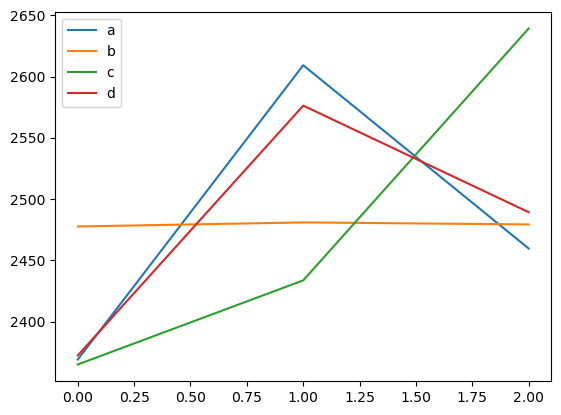

In [13]:
a = numpy.array([a1,a2,a3])
b = numpy.array([b1,b2,b3])
c = numpy.array([c1,c2,c3])
d = numpy.array([d1,d2,d3])
pyplot.plot(a, label='a')
pyplot.plot(b, label = 'b')
pyplot.plot(c, label = 'c')
pyplot.plot(d, label = 'd')
pyplot.legend();

(c) Based on these 9 experiments, which levels of each parameter do you recommend?

Results are independent of $b$.  $X$ is maximized for $a_2, c_3, d_2$.  

(d) Is a confirmatory experiment required?  If so, what are the levels to be tested?

This was not tested, so we would need to do a confirmatory run at: $a_2, b_i, c_3, d_2$